### 1.	Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:
a.	Import the necessary packages
b.	Load the training and testing data
c.	Define the network architecture using Keras
d.	Train the model using SGD with 11 epochs
e.	Evaluate the network
f.	Plot the training loss and accuracy

### 12.	Implementing Feedforward neural networks with Keras and TensorFlow
a.	Import the necessary packages
b.	Load the training and testing data (MNIST/CIFAR10)
c.	Define the network architecture using Keras
d.	Train the model using SGD
e.	Evaluate the network
f.	Plot the training loss and accuracy


In [1]:
import numpy as np 
#library used for numerical operations with arrays and matrices.in code reshaping images and normalizing pixel values.

import pandas as pd
#library used to load and manage datasets 

import matplotlib.pyplot as plt
#visualize images from the MNIST dataset

import tensorflow as tf
#open-source library for building deep learning networks.used here to define and train a neural network model that will classify MNIST digits.

from tensorflow.keras.models import Sequential
#allows you to stack layers sequentially layers like Dense, Flatten, and Dropouty, which is useful for simple, straightforward neural network architectures.
#output of one layer is input to next

from tensorflow.keras.layers import Dense, Dropout
#a fully connected layer where each neuron is connected to every neuron in the previous layer
#regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting.

from tensorflow.keras.utils import to_categorical
#converts integer labels into one-hot encoded vectors
#in the MNIST dataset, the digit labels (0-9) are converted into a binary format where each class is represented by a unique binary vector.

In [2]:
train = pd.read_csv('./datasets/mnist_train.csv')
test = pd.read_csv('./datasets/mnist_test.csv')

In [3]:
x_train = train.drop('label',axis=1)
# removes label column from train DataFrame, which contains the actual digit label (0, 1, 2, etc.) for each image.

x_test = test.drop('label',axis=1)

In [4]:
# normalization
#Each pixel in the MNIST dataset has intensity between 0 and 255. By dividing by 255.0, we scale these values to fall within the range [0, 1].
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
y_train = train['label']
y_test = test['label']

In [6]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
y_train[:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: label, dtype: int64

In [8]:
#this is one hot encoding
#Compatibility with Categorical Cross-Entropy Loss

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [9]:
print('X Train Shape : '+str(x_train.shape))
print('X Test Shape : '+str(x_test.shape))
print('Y Train Shape : '+str(y_train.shape))
print('Y Test Shape : '+str(y_test.shape))

X Train Shape : (60000, 784)
X Test Shape : (10000, 784)
Y Train Shape : (60000, 10)
Y Test Shape : (10000, 10)


In [10]:
model = Sequential([
    Dense(128,activation='relu'),
    #has 128 neurons, 
    #Rectified Linear Unit (ReLU) activation function,ReLU introduces non-linearity into the model, allowing it to learn complex patterns in the data.
    #Without non-linearity, a neural network would behave like a linear model, limiting its ability to solve complex problems.
    Dropout(0.2),
    #randomly drops 20% of the neurons during training.It helps prevent overfitting by ensuring that the model doesn't rely too heavily on any one neuron
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
    #The final layer has 10 units, corresponding to the 10 possible classes (digits 0 through 9) in the MNIST dataset.
    #softmax outputs a probability distribution, where each unit represents the probability of a particular class. 
    #The sum of all output probabilities equals 1, and the class with the highest probability is chosen as the predicted class.
])

#Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise and random fluctuations.
#Underfitting occurs when a model is too simple to capture the underlying patterns in the data. 
#It doesn’t learn the important relationships in the training data and, as a result, performs poorly on both the training data and the test data.

In [11]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#Stochastic Gradient Descent. Optimizer controls how the model is updated during training. 
#It determines how the weights of the model should be adjusted based on the gradients of the loss function.
#The loss function measures how well the model’s predictions match the actual results. The goal is to minimize the loss during training.
#tells Keras to monitor the accuracy of the model during training and evaluation.

In [12]:
history = model.fit(x_train,y_train,epochs=11,validation_data=(x_test,y_test))

#epochs=11: The number of times the entire training dataset will be passed through the model. 
#Each epoch involves updating the model's weights based on the gradients computed from the loss function.
#This data is used to evaluate the model's performance after each epoch

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4697 - loss: 1.5304 - val_accuracy: 0.8947 - val_loss: 0.3778
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8393 - loss: 0.5397 - val_accuracy: 0.9248 - val_loss: 0.2629
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8806 - loss: 0.4057 - val_accuracy: 0.9388 - val_loss: 0.2070
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9044 - loss: 0.3420 - val_accuracy: 0.9471 - val_loss: 0.1753
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9179 - loss: 0.2889 - val_accuracy: 0.9525 - val_loss: 0.1548
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9262 - loss: 0.2574 - val_accuracy: 0.9558 - val_loss: 0.1444
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9340 - loss: 0.2354 - val_accuracy: 0.9593 - val_loss: 0.1341
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.9400 - loss: 0.214

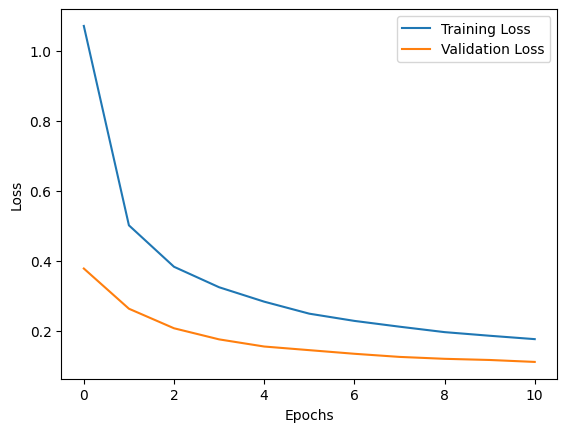

In [13]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Loss is a measure of how well or poorly the model's predictions match the actual labels 
#This shows how well the model is fitting to the training data. It is expected to decrease as the model learns.
#This shows how well the model performs on the validation data. If the validation loss increases while the training loss decreases, this may indicate overfitting.

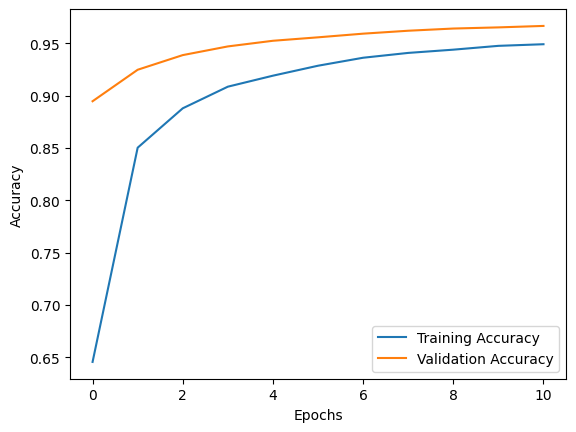

In [14]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy is the percentage of correct predictions made by the model.
#This represents the accuracy of the model on the training data.
#This represents the accuracy of the model on the validation data,
#If validation accuracy stops improving or decreases while training accuracy continues to improve, it could be a sign of overfitting.

In [15]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.9613 - loss: 0.1309


In [16]:
y_pred = model.predict(x_test)
#is used to make predictions on the test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


Actual Label : 9
Predicted Label : 9


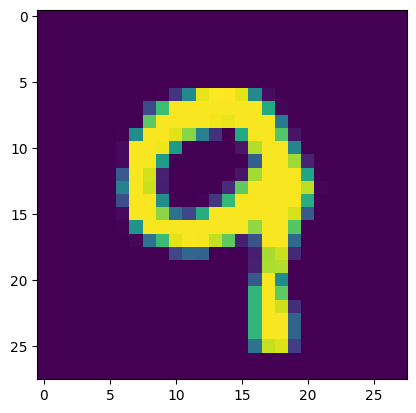

In [17]:
n=99
plt.imshow(x_test.iloc[n].values.reshape(28, 28))
print('Actual Label : '+str(np.argmax(y_test[n])))
print('Predicted Label : '+str(np.argmax(y_pred[n])))
plt.show()